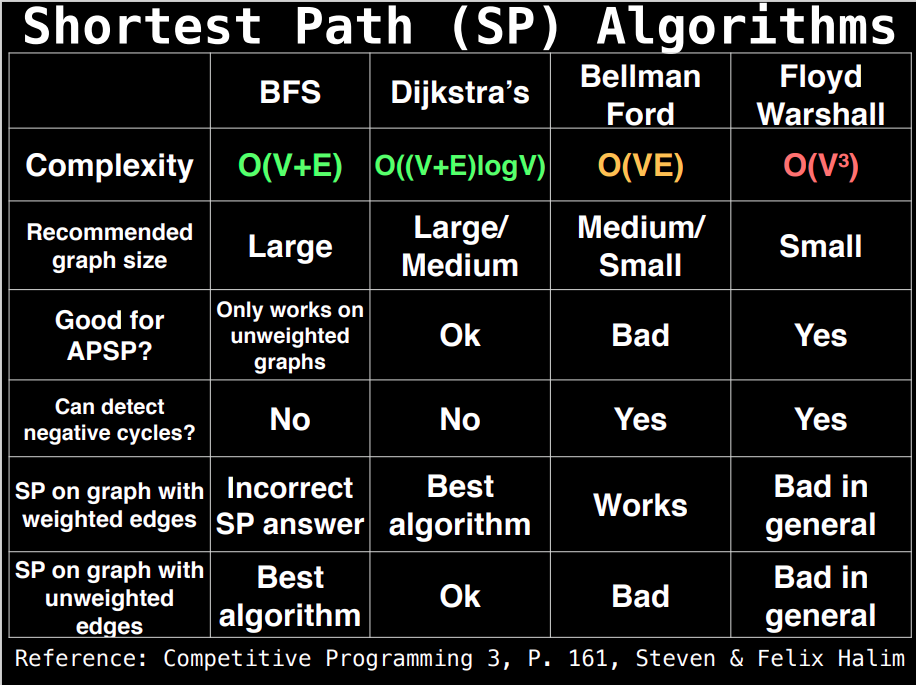

In [1]:
from util.view import view_graph
from util.graph_structures import AdjacencyList, AdjacencyMatrix
from algorithms.breadth_first_search import BreadthFirstSearch
from algorithms.path_finding.dijkstra import DijkstraAlgorithm
from algorithms.path_finding.bellman_ford import BellmanFordAlgorithm
from algorithms.path_finding.floyd_warshall import FloydWarshallAlgorithm

In [2]:
graph = AdjacencyList(14)
graph.add_edge(0, 1, directed=False)
graph.add_edge(0, 2, directed=False)
graph.add_edge(0, 3, directed=False)
graph.add_edge(2, 9, directed=False)
graph.add_edge(8, 2, directed=False)
graph.add_edge(3, 4, directed=False)
graph.add_edge(10, 11, directed=False)
graph.add_edge(12, 13, directed=False)
graph.add_edge(3, 5, directed=False)
graph.add_edge(5, 7, directed=False)
graph.add_edge(5, 6, directed=False)
graph.add_edge(0, 10, directed=False)
graph.add_edge(11, 12, directed=False)

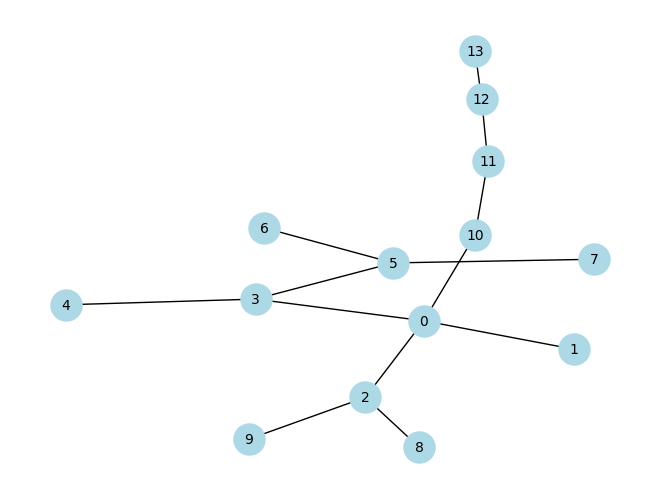

In [3]:
view_graph(graph, directed=False)

In [4]:
bfs = BreadthFirstSearch(graph)

In [5]:
bfs.solve(12)

6

In [6]:
graph.graph

[[(1, 0), (2, 0), (3, 0), (10, 0)],
 [(0, 0)],
 [(0, 0), (9, 0), (8, 0)],
 [(0, 0), (4, 0), (5, 0)],
 [(3, 0)],
 [(3, 0), (7, 0), (6, 0)],
 [(5, 0)],
 [(5, 0)],
 [(2, 0)],
 [(2, 0)],
 [(11, 0), (0, 0)],
 [(10, 0), (12, 0)],
 [(13, 0), (11, 0)],
 [(12, 0)]]

In [8]:
for node, neighbors in enumerate(graph):
    for neighbor in neighbors:
        print(neighbor)
        break
#       G.add_edge(node, neighbor)

(1, 0)
(0, 0)
(0, 0)
(0, 0)
(3, 0)
(3, 0)
(5, 0)
(5, 0)
(2, 0)
(2, 0)
(11, 0)
(10, 0)
(13, 0)
(12, 0)


# Dijkstra

Usa uma tabela distance de nodo start para cada outro nodo
Usa um priority queue, e sempre usa a menor distância
Visita todos os vizinhos, atualiza a tabela distance e vai para o próximo nodo.
Não pode ser usado com negative edge weights.

In [7]:
graph = AdjacencyList(5)
graph.add_edge(0, 1, 4)
graph.add_edge(0, 2, 1)
graph.add_edge(1, 3, 1)
graph.add_edge(2, 1, 2)
graph.add_edge(2, 3, 5)
graph.add_edge(3, 4, 3)

In [8]:
graph.graph

[[(1, 4), (2, 1)], [(3, 1)], [(1, 2), (3, 5)], [(4, 3)], []]

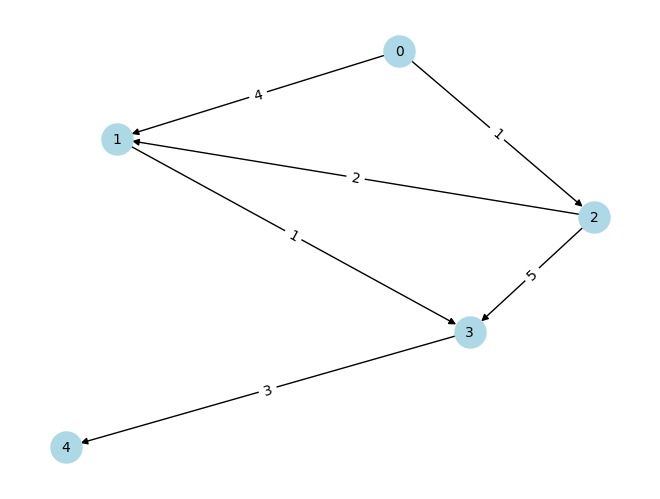

In [9]:
view_graph(graph)

In [10]:
dijkstra = DijkstraAlgorithm(graph)

In [11]:
dijkstra.solve_lazy(start=0, end=4)

7

In [12]:
dijkstra.solve_eager(start=0, end=4)

7

In [13]:
dijkstra.reconstruct_path(0, 4)

[0, 2, 1, 3, 4]

# Dijkstra's eager

In [14]:
graph = AdjacencyList(6)
graph.add_edge(0, 1, 5)
graph.add_edge(0, 2, 1)
graph.add_edge(1, 2, 2)
graph.add_edge(1, 3, 3)
graph.add_edge(1, 4, 20)
graph.add_edge(2, 1, 3)
graph.add_edge(2, 4, 12)
graph.add_edge(3, 2, 3)
graph.add_edge(3, 4, 2)
graph.add_edge(3, 5, 6)
graph.add_edge(4, 5, 1)

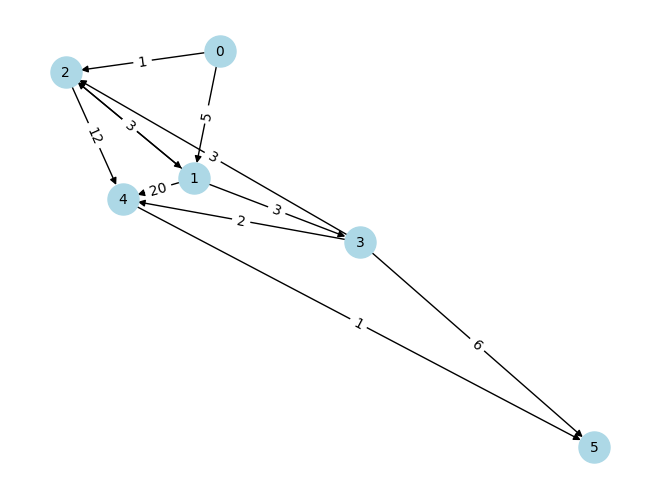

In [15]:
view_graph(graph)

In [16]:
dijkstra = DijkstraAlgorithm(graph)

In [17]:
dijkstra.solve_lazy(start=0, end=5)

10

In [18]:
dijkstra.solve_eager(start=0, end=5)

10

In [19]:
dijkstra.reconstruct_path(0, 5, lazy=False)

[0, 2, 1, 3, 4, 5]

# Bellman-Ford algorithm

O(EV)
Support negative edge weights and can detect negative cycles and determine where they occur.
Use cases: financial arbitrage between two or more markets.

E edges
V vertices
S starting node
distance array of size V, tracks best distance
Relax each edge V-1 times

In [20]:
graph = AdjacencyList(10)
graph.add_edge(0, 1, 5)
graph.add_edge(1, 2, 20)
graph.add_edge(1, 5, 30)
graph.add_edge(1, 6, 60)
graph.add_edge(2, 3, 10)
graph.add_edge(2, 4, 75)
graph.add_edge(3, 2, -15)
graph.add_edge(4, 9, 100)
graph.add_edge(5, 4, 25)
graph.add_edge(5, 6, 5)
graph.add_edge(5, 8, 50)
graph.add_edge(6, 7, -50)
graph.add_edge(7, 8, -10)

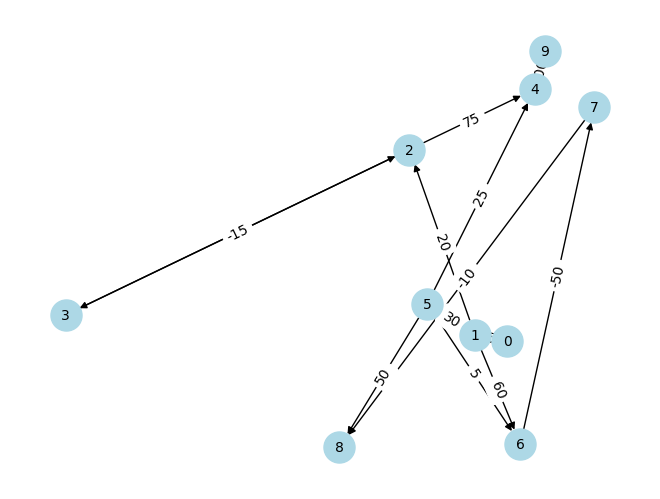

In [21]:
view_graph(graph)

In [22]:
graph.graph

[[(1, 5)],
 [(2, 20), (5, 30), (6, 60)],
 [(3, 10), (4, 75)],
 [(2, -15)],
 [(9, 100)],
 [(4, 25), (6, 5), (8, 50)],
 [(7, -50)],
 [(8, -10)],
 [],
 []]

In [23]:
bf = BellmanFordAlgorithm(graph)

In [24]:
dist = bf.solve(0)

In [25]:
dist

[0, 5, -inf, -inf, -inf, 35, 40, -10, -20, -inf]

In [26]:
graph = AdjacencyList(9)
graph.add_edge(0, 1, 1)
graph.add_edge(1, 2, 1)
graph.add_edge(2, 4, 1)
graph.add_edge(4, 3, -3)
graph.add_edge(3, 2, 1)
graph.add_edge(1, 5, 4)
graph.add_edge(1, 6, 4)
graph.add_edge(5, 6, 5)
graph.add_edge(6, 7, 4)
graph.add_edge(5, 7, 3)

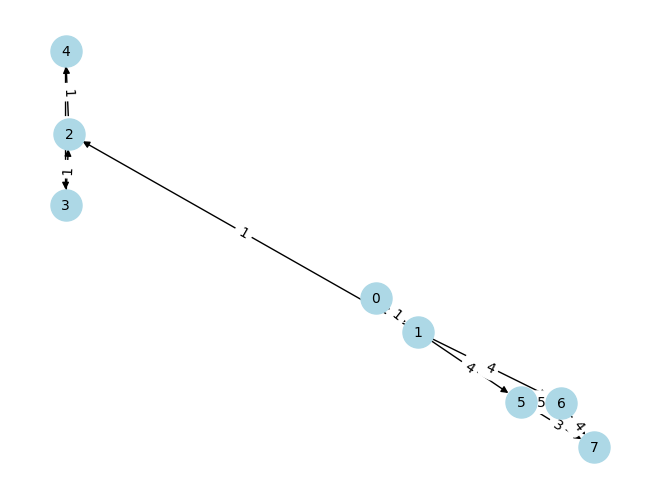

In [27]:
view_graph(graph)

In [28]:
bf = BellmanFordAlgorithm(graph)

In [29]:
dist = bf.solve(0)

In [30]:
dist

[0, 1, -inf, -inf, -inf, 5, 5, 8, inf]

# Floyd-Warshall

O(V^3)
All pairs shortest path (APSP)

In [1]:
from util.view import view_graph
from util.graph_structures import AdjacencyList, AdjacencyMatrix
from algorithms.breadth_first_search import BreadthFirstSearch
from algorithms.path_finding.dijkstra import DijkstraAlgorithm
from algorithms.path_finding.bellman_ford import BellmanFordAlgorithm
from algorithms.path_finding.floyd_warshall import FloydWarshallAlgorithm

In [2]:
graph = AdjacencyMatrix(7)
graph.add_edge(0, 1, 2)
graph.add_edge(0, 2, 5)
graph.add_edge(0, 6, 10)
graph.add_edge(1, 2, 2)
graph.add_edge(1, 4, 11)
graph.add_edge(2, 6, 2)
graph.add_edge(6, 5, 11)
graph.add_edge(4, 5, 1)
graph.add_edge(5, 4, -2)

In [3]:
graph.graph

[[0, 2, 5, inf, inf, inf, 10],
 [inf, 0, 2, inf, 11, inf, inf],
 [inf, inf, 0, inf, inf, inf, 2],
 [inf, inf, inf, 0, inf, inf, inf],
 [inf, inf, inf, inf, 0, 1, inf],
 [inf, inf, inf, inf, -2, 0, inf],
 [inf, inf, inf, inf, inf, 11, 0]]

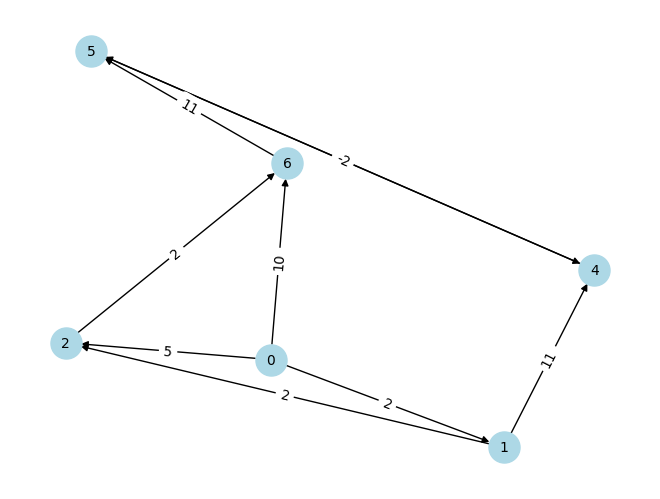

In [4]:
view_graph(graph)

In [5]:
fw = FloydWarshallAlgorithm(graph)

In [6]:
dist = fw.solve()

In [7]:
dist

[[0, 2, 4, inf, -inf, -inf, 6],
 [inf, 0, 2, inf, -inf, -inf, 4],
 [inf, inf, 0, inf, -inf, -inf, 2],
 [inf, inf, inf, 0, inf, inf, inf],
 [inf, inf, inf, inf, -inf, -inf, inf],
 [inf, inf, inf, inf, -inf, -inf, inf],
 [inf, inf, inf, inf, -inf, -inf, 0]]

In [10]:
fw.reconstruct_path(0, 6)

[0, 1, 2, 6]